<a href="https://colab.research.google.com/github/KiranVarghese25/ml_labfiles/blob/main/ML_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necessary libraries **

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

**Loading the Data set **

In [5]:
data=pd.read_csv('/content/Churn_Modelling - Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Checking for null Values **

In [8]:
#checking for the number of null values in all columns
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Checking for Noisy data and eliminating the unwanted columns**

In [9]:
#dropping the following columns as they are not useful for further analysis
new_data=data.drop(['CustomerId','Surname','RowNumber'],axis=1)


In [10]:
#converting gender and geography  into a numeric column
new_data['Gender']=new_data['Gender'].replace(['Male','Female'],[0,1])
new_data['Geography']=new_data['Geography'].replace(['France','Spain','Germany'],[0,1,2])
new_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


**Checking for outliers**

In [11]:
#checking for outliers using Z score
zscore_new_data=new_data.apply(zscore)
zscore_new_data = zscore_new_data.apply(lambda col: col.sort_values(ascending=True).values)
zscore_new_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-3.109504,-0.902587,-0.912419,-1.994969,-1.733315,-1.225848,-0.911583,-1.547768,-1.030670,-1.740268,-0.505775
1,-3.109504,-0.902587,-0.912419,-1.994969,-1.733315,-1.225848,-0.911583,-1.547768,-1.030670,-1.738903,-0.505775
2,-3.109504,-0.902587,-0.912419,-1.994969,-1.733315,-1.225848,-0.911583,-1.547768,-1.030670,-1.738874,-0.505775
3,-3.109504,-0.902587,-0.912419,-1.994969,-1.733315,-1.225848,-0.911583,-1.547768,-1.030670,-1.738795,-0.505775
4,-3.109504,-0.902587,-0.912419,-1.994969,-1.733315,-1.225848,-0.911583,-1.547768,-1.030670,-1.738614,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...
9995,2.063884,1.505917,1.095988,4.298368,1.724464,2.237769,4.246377,0.646092,0.970243,1.735754,1.977165
9996,2.063884,1.505917,1.095988,4.393722,1.724464,2.324683,4.246377,0.646092,0.970243,1.736099,1.977165
9997,2.063884,1.505917,1.095988,4.679783,1.724464,2.336460,4.246377,0.646092,0.970243,1.736519,1.977165
9998,2.063884,1.505917,1.095988,5.061197,1.724464,2.594816,4.246377,0.646092,0.970243,1.736822,1.977165


In [12]:
#checking the number of outliers in the data
outliers_count=((zscore_new_data > 3) | (zscore_new_data < -3 )).sum()
outliers_count

CreditScore          8
Geography            0
Gender               0
Age                133
Tenure               0
Balance              0
NumOfProducts       60
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [33]:
# Filter the rows to exclude outliers based on z-scores
clean_data = new_data[~((zscore_new_data > 3) | (zscore_new_data < -3)).any(axis=1)]
clean_data


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,501,0,0,44,4,142051.07,2,0,1,74940.50,0
9,684,0,0,27,2,134603.88,1,1,1,71725.73,0
10,528,0,0,31,6,102016.72,2,0,0,80181.12,0
11,497,1,0,24,3,0.00,2,1,0,76390.01,0
12,476,0,1,34,10,0.00,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9862,756,0,0,27,8,0.00,2,1,1,157932.75,0
9863,757,2,1,43,5,131433.33,2,1,1,3497.43,1
9864,742,2,0,33,1,137937.95,1,1,1,51387.10,0
9865,591,0,0,49,3,0.00,2,1,0,50123.44,0


In [47]:
#binning
bin_classes=[18,20,30,40,50,60,70,80,90,100]
bin_labels=['18-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+']
clean_data['Age_class']=pd.cut(clean_data['Age'],bins=bin_classes,labels=bin_labels)
clean_data



<ipython-input-47-2aeb9ab64cd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Age_class']=pd.cut(clean_data['Age'],bins=bin_classes,labels=bin_labels)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_class
8,501,0,0,44,4,142051.07,2,0,1,74940.50,0,40-49
9,684,0,0,27,2,134603.88,1,1,1,71725.73,0,20-29
10,528,0,0,31,6,102016.72,2,0,0,80181.12,0,30-39
11,497,1,0,24,3,0.00,2,1,0,76390.01,0,20-29
12,476,0,1,34,10,0.00,2,1,0,26260.98,0,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...
9862,756,0,0,27,8,0.00,2,1,1,157932.75,0,20-29
9863,757,2,1,43,5,131433.33,2,1,1,3497.43,1,40-49
9864,742,2,0,33,1,137937.95,1,1,1,51387.10,0,30-39
9865,591,0,0,49,3,0.00,2,1,0,50123.44,0,40-49


**EDA**

In [38]:
#corelation matrix
corr = clean_data.corr(method = 'pearson')
corr

<ipython-input-38-87b18ad1f534>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = clean_data.corr(method = 'pearson')


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.009769,0.001244,-0.002330,0.002937,0.007862,0.016580,-0.006756,0.025671,-0.001577,-0.025012
Geography,0.009769,1.000000,0.018055,0.048120,0.001742,0.348805,-0.007216,0.003932,-0.013836,0.006859,0.152994
Gender,0.001244,0.018055,1.000000,0.027369,-0.016065,-0.012798,0.022614,-0.005522,-0.023662,0.006182,0.106554
Age,-0.002330,0.048120,0.027369,1.000000,-0.009811,0.028519,-0.030749,-0.011098,0.083872,-0.006024,0.285494
Tenure,0.002937,0.001742,-0.016065,-0.009811,1.000000,-0.012627,0.012512,0.022893,-0.029469,0.005754,-0.014255
Balance,0.007862,0.348805,-0.012798,0.028519,-0.012627,1.000000,-0.305404,-0.016074,-0.009851,0.013904,0.118912
NumOfProducts,0.016580,-0.007216,0.022614,-0.030749,0.012512,-0.305404,1.000000,0.002380,0.010012,0.013114,-0.049168
HasCrCard,-0.006756,0.003932,-0.005522,-0.011098,0.022893,-0.016074,0.002380,1.000000,-0.011147,-0.009609,-0.008530
IsActiveMember,0.025671,-0.013836,-0.023662,0.083872,-0.029469,-0.009851,0.010012,-0.011147,1.000000,-0.009936,-0.157942
EstimatedSalary,-0.001577,0.006859,0.006182,-0.006024,0.005754,0.013904,0.013114,-0.009609,-0.009936,1.000000,0.012776


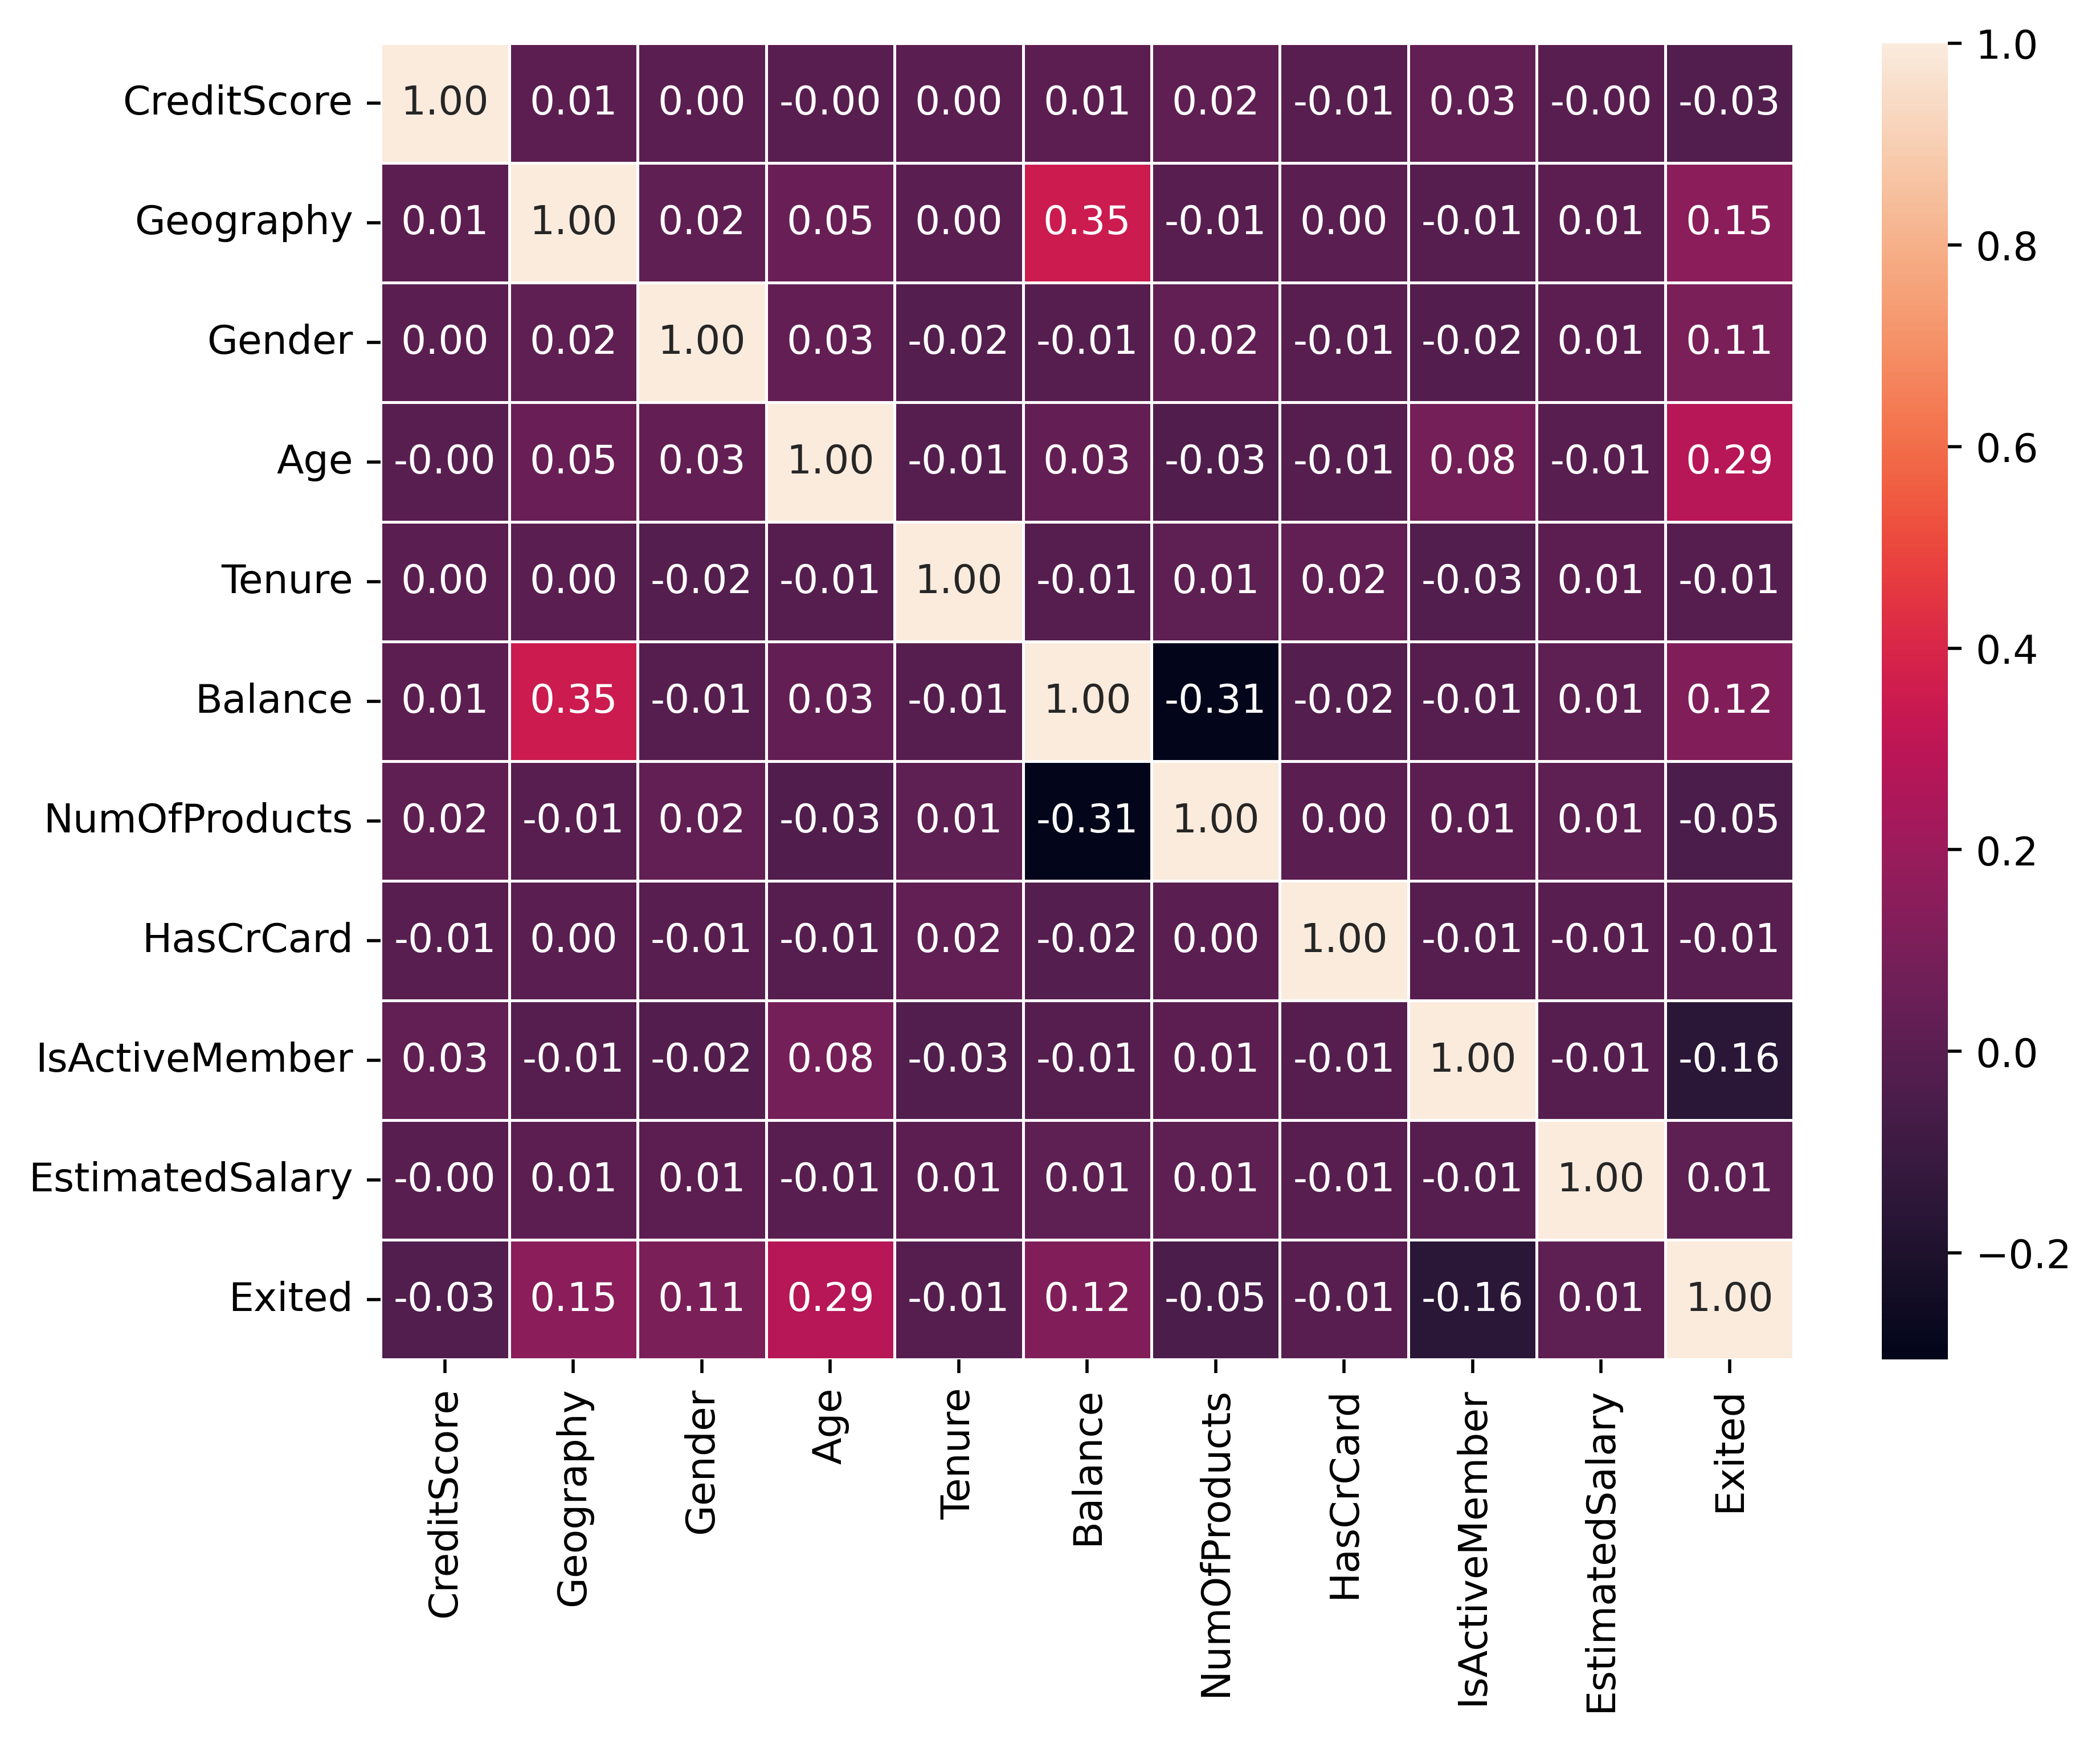

In [15]:
#heatmap
plt.figure(figsize=(8,6), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

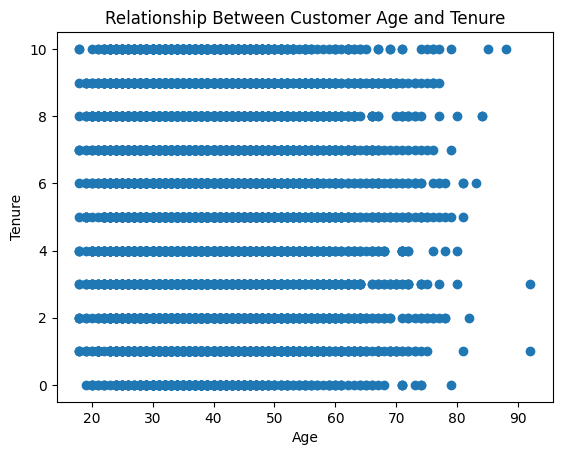

In [16]:

#relationship between customer age and tenure

plt.scatter(clean_data['Age'], clean_data['Tenure'])
plt.title('Relationship Between Customer Age and Tenure')
plt.xlabel('Age')
plt.ylabel('Tenure')
plt.show()



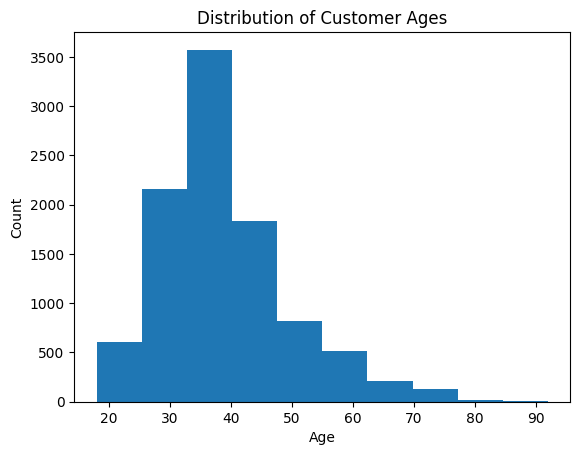

In [17]:
#Histogram showing the distrubution of the customers age
plt.hist(clean_data['Age'])
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

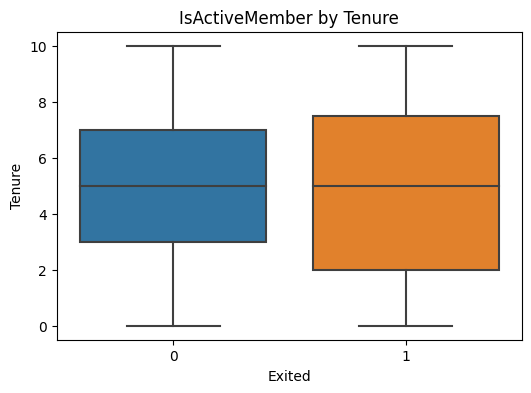

In [63]:
   #Box plot showing the comparison of the customers who are active and their duration as customer for both exited as well non exited customers
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Exited', y='Tenure', data=clean_data)
    plt.title(f"{feature} by Tenure")
    plt.show()

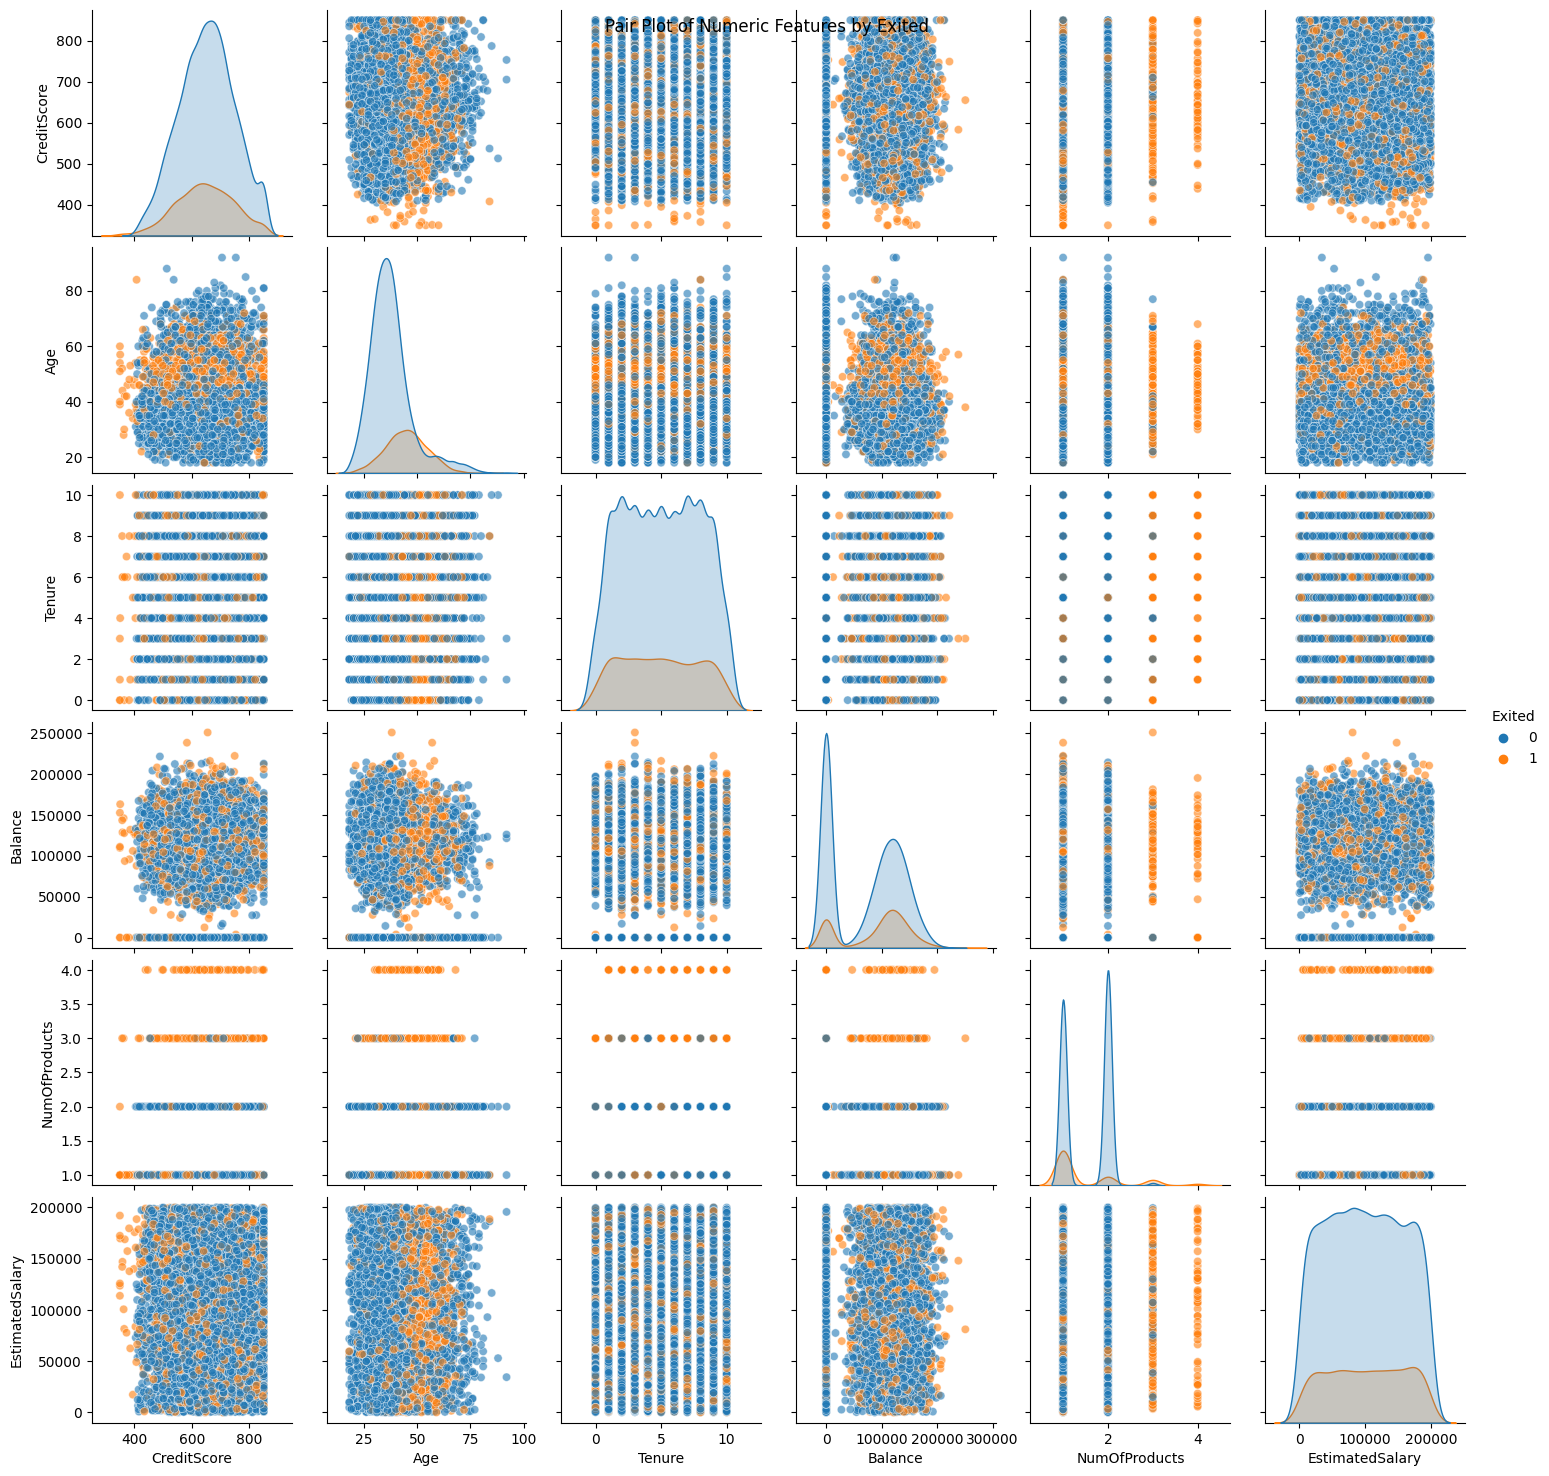

In [67]:
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

#pair plot
sns.pairplot(clean_data, vars=numeric_features, hue='Exited', plot_kws={'alpha':0.6})
plt.suptitle("Pair Plot of Numeric Features by Exited")
plt.show()


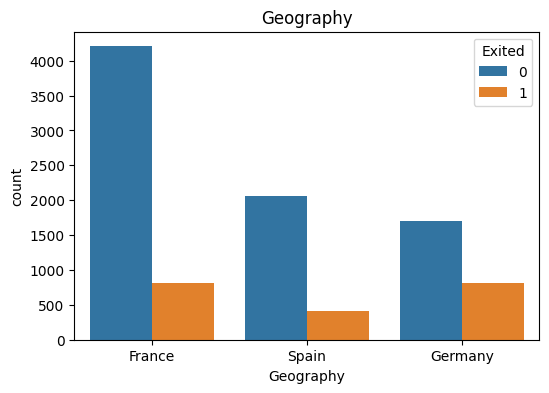

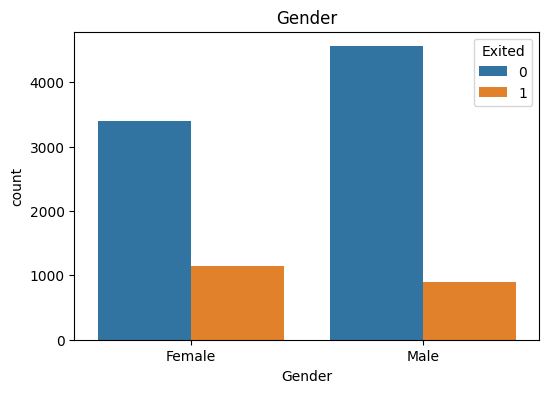

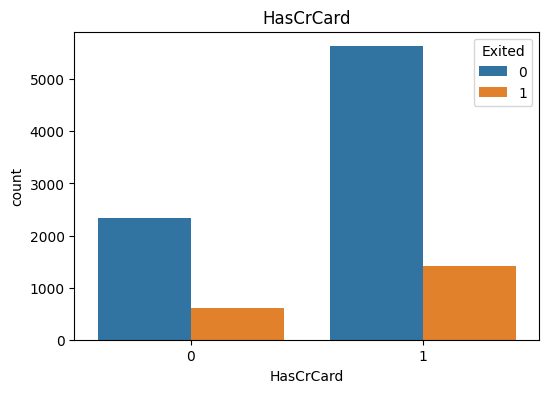

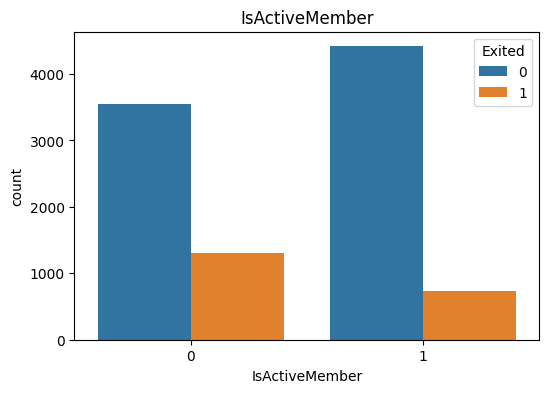

In [65]:
# Countplot for categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='Exited', data=data)
    plt.title(feature)
    plt.show()


 Data scaling by using **Standardization**

In [23]:
#doing data scaling to ensure that data is ditributed consistently
scaler = MinMaxScaler()
cols_stand=['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']
clean_data[cols_stand] = scaler.fit_transform(clean_data[cols_stand])
clean_data

<ipython-input-23-724e05188f91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data[cols_stand] = scaler.fit_transform(clean_data[cols_stand])


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,0.302,0,0,0.351351,4,0.566170,0.333333,0,1,0.374680,0
9,0.668,0,0,0.121622,2,0.536488,0.000000,1,1,0.358605,0
10,0.356,0,0,0.175676,6,0.406606,0.333333,0,0,0.400886,0
11,0.294,1,0,0.081081,3,0.000000,0.333333,1,0,0.381929,0
12,0.252,0,1,0.216216,10,0.000000,0.333333,1,0,0.131260,0
...,...,...,...,...,...,...,...,...,...,...,...
9862,0.812,0,0,0.121622,8,0.000000,0.333333,1,1,0.789681,0
9863,0.814,2,1,0.337838,5,0.523851,0.333333,1,1,0.017431,1
9864,0.784,2,0,0.202703,1,0.549777,0.000000,1,1,0.256902,0
9865,0.482,0,0,0.418919,3,0.000000,0.333333,1,0,0.250583,0


Dimensionality Reduction using **PCA**

In [27]:
pca=PCA(n_components=5)
data_after_pca=pca.fit_transform(clean_data)
data_after_pca


array([[ 1.01396829, -0.75308168, -0.64952605, -0.03391037,  0.70245674],
       [ 3.01028294, -0.75385746, -0.64117736, -0.11620945, -0.3009946 ],
       [-0.9915023 , -0.75340829,  0.10257104, -0.61653028,  0.74293588],
       ...,
       [ 4.00929917,  1.22514471, -0.75871525, -0.12204523, -0.31037443],
       [ 2.00444778, -0.793948  ,  0.11639358, -0.68693183, -0.27061906],
       [ 1.00760725, -0.79770865,  0.10832068, -0.62222247,  0.73541508]])

Splitting the dataset Before balancing the data using the **smote** technique

In [52]:
features=['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
target=['Exited']

X = clean_data[features]
y = clean_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12576 entries, 0 to 12575
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      12576 non-null  int64  
 1   Geography        12576 non-null  int64  
 2   Gender           12576 non-null  int64  
 3   Age              12576 non-null  int64  
 4   Tenure           12576 non-null  int64  
 5   Balance          12576 non-null  float64
 6   NumOfProducts    12576 non-null  int64  
 7   HasCrCard        12576 non-null  int64  
 8   IsActiveMember   12576 non-null  int64  
 9   EstimatedSalary  12576 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 982.6 KB
None
